# Scalability

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path, PosixPath
from typing import Union, List
import os

## Load Data

In [2]:
def load_results(experiments: Union[str, List, PosixPath]) -> pd.DataFrame:
    if type(experiments) == list:
        dfs = [pd.read_csv(f"../results/{directory}/results.csv") for directory in experiments]
        return pd.concat(dfs, ignore_index=True)
    elif type(experiments) == str:
        return pd.read_csv(f"../results/{experiments}/results.csv")
    elif type(experiments) == PosixPath:
        return pd.read_csv(experiments)

### Scalability Results

In [3]:
df_0 = load_results(["scalability_repeat", "scalability_xl"])
df_0 = df_0[~df_0.algorithm.isin(["S2G++1p-KDE", "S2G++20p-KDE"])]

In [4]:
df_1 = load_results("scalability-05-05")
df_1 = df_1[df_1.algorithm.isin(["Torsk"])]

In [5]:
df_2 = load_results(Path("../results/scalability-0.8.0.csv"))

In [6]:
df_3 = load_results(Path("../results/scalability-xl-0.8.0.csv"))

In [7]:
df_4 = load_results("scalability_distributed")

In [8]:
df_5 = load_results(Path("../results/scalability-kmeans.csv"))

### Combine Results

In [9]:
def get_dataset_length(dataset_name: str) -> int:
    return int(dataset_name.split(".")[0].split("-")[1])

def get_dataset_width(dataset_name: str) -> int:
    return int(dataset_name.split(".")[0].split("-")[2])

In [10]:
df = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [11]:
with_dataset = df.loc[~df.dataset.isna()]
df.loc[~df.dataset.isna(), "dataset_length"] = with_dataset.dataset.apply(get_dataset_length)
df.loc[~df.dataset.isna(), "dataset_width"] = with_dataset.dataset.apply(get_dataset_width)

## OOM/Timeout

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
df.groupby(["algorithm", "dataset_length"])[["status"]].agg(lambda x: x.unique()).reset_index().pivot(index="dataset_length", columns="algorithm", values="status")

algorithm,DBStream,LSTM-AD,Normalizing Flows,S2G++1p-KDE,S2G++1p-MeanShift,S2G++20p-KDE,S2G++20p-KDE-Distributed,S2G++20p-MeanShift,Torsk,k-Means,mSTAMP
dataset_length,,,,,,,,,,,
10000.0,"[Status.OK, Status.ERROR]",Status.OK,"[Status.OK, Status.ERROR]","[Status.OK, Status.ERROR]",Status.OK,"[Status.OK, Status.ERROR]",NaN,Status.OK,"[Status.OK, Status.ERROR]",Status.OK,Status.OK
20000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.ERROR, Status.OK]",NaN,Status.OK
40000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,Status.ERROR,NaN,Status.OK
80000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",NaN,Status.OK
160000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",NaN,Status.OK
320000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,Status.OK,NaN,Status.OK
640000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",NaN,Status.OK
1280000.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",NaN,Status.OK
2560000.0,Status.OK,Status.ERROR,Status.OK,Status.OK,Status.ERROR,Status.OK,NaN,Status.ERROR,Status.OK,NaN,Status.TIMEOUT


In [14]:
df.groupby(["algorithm", "dataset_width"])[["status"]].agg(lambda x: x.unique()).reset_index().pivot(index="dataset_width", columns="algorithm", values="status")

algorithm,DBStream,LSTM-AD,Normalizing Flows,S2G++1p-KDE,S2G++1p-MeanShift,S2G++20p-KDE,S2G++20p-KDE-Distributed,S2G++20p-MeanShift,Torsk,k-Means,mSTAMP
dataset_width,,,,,,,,,,,
1.0,"[Status.OK, Status.ERROR]","[Status.OK, Status.ERROR, Status.TIMEOUT]","[Status.OK, Status.TIMEOUT]","[Status.OK, Status.ERROR]","[Status.OK, Status.ERROR, Status.TIMEOUT]","[Status.OK, Status.ERROR]",NaN,"[Status.OK, Status.ERROR]","[Status.ERROR, Status.OK]",Status.OK,"[Status.OK, Status.TIMEOUT]"
2.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,Status.OK,Status.OK,Status.OK
4.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",Status.OK,Status.OK
6.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,Status.OK,Status.OK,Status.OK
8.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,Status.OK,Status.OK,Status.OK
10.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.ERROR, Status.OK]",Status.OK,Status.OK
12.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",Status.OK,Status.OK
14.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.OK, Status.ERROR]",Status.OK,Status.OK
16.0,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,Status.OK,NaN,Status.OK,"[Status.ERROR, Status.OK]",Status.OK,Status.OK


## Plot

In [13]:
sns.set(rc={"figure.figsize":(20, 10)})

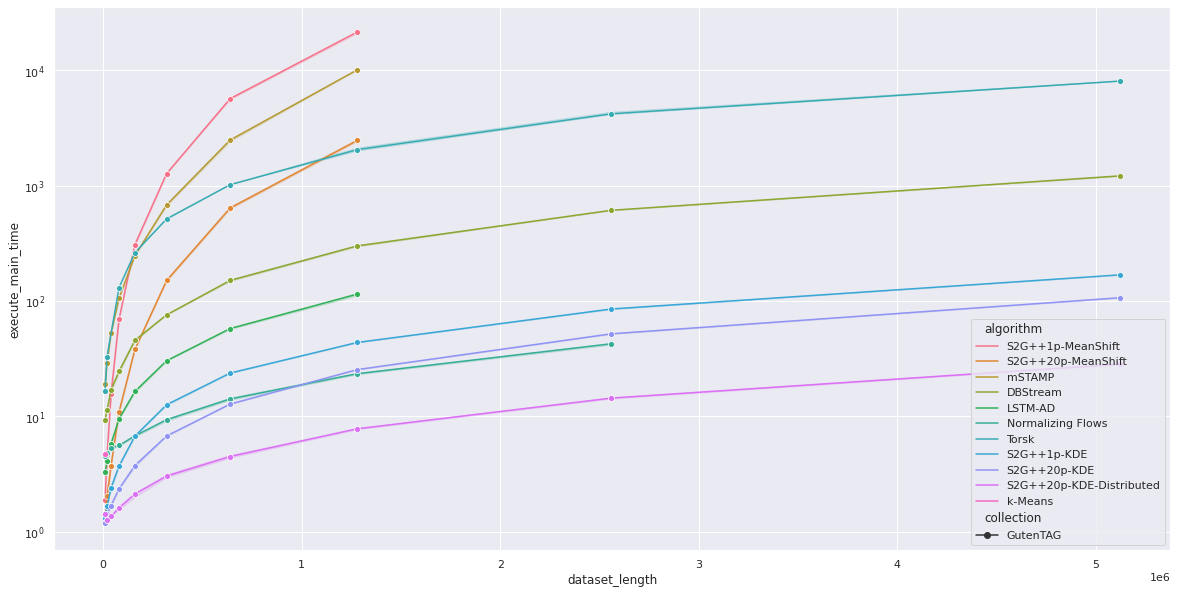

In [14]:
g = sns.lineplot(data=df[(df.dataset_width == 1) & (df.dataset_length <= 5120000)], x="dataset_length", y="execute_main_time", hue="algorithm", style="collection", markers=True)
g.set(yscale="log");

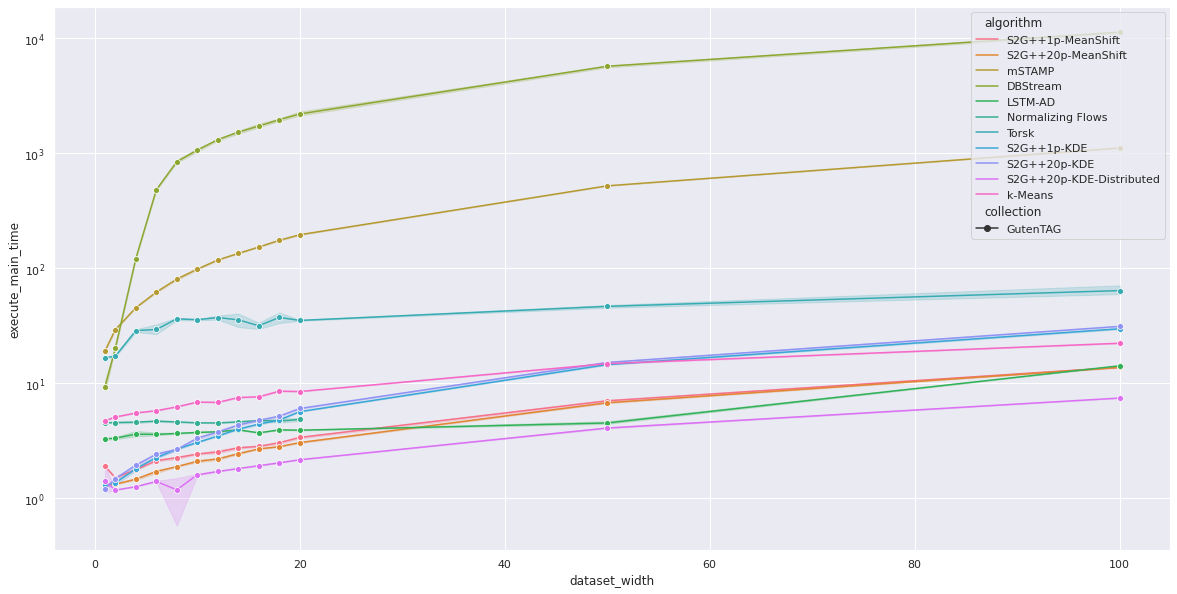

In [20]:
g = sns.lineplot(data=df[(df.dataset_length == 10000) & (df.dataset_width <= 100)], x="dataset_width", y="execute_main_time", hue="algorithm", style="collection", markers=True)
g.set(yscale="log");

### Export

In [21]:
df[(df.dataset_length == 10000) & (df.dataset_width <= 100)].pivot_table(index="algorithm", columns="dataset_width", values="execute_main_time").transpose().reset_index().to_csv("scalability.width.csv", index=False)

In [18]:
df[(df.dataset_width == 1) & (df.dataset_length >= 5120000)].pivot_table(index="algorithm", columns="dataset_length", values="execute_main_time").transpose().reset_index()#.to_csv("scalability-xl.length.csv", index=False)

algorithm,dataset_length,DBStream,S2G++1p-KDE,S2G++20p-KDE,S2G++20p-KDE-Distributed,Torsk,k-Means
0,5120000.0,1211.973451,168.208085,106.544861,28.303333,8028.050093,2179.236779
1,20000000.0,NaN,NaN,NaN,112.790000,NaN,2091.299134
2,50000000.0,NaN,NaN,NaN,305.340000,NaN,6768.016914
